In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import common

# 花ブロック透過率の簡易計算法検討のためのパラメトリックスタディ

## 作図用の関数を定義
### 花ブロックのタイプ別にプロットする関数

In [3]:
def setPltScatterByType(df:pd.DataFrame, fig_title:str, x_label:str, y_label:str, x_data_name:str, y_data_name:str,
                 xlim_min:float, xlim_max:float, ylim_min:float, ylim_max:float, file_name:str):
    
    """
    グラフを描画する
    
    :param df: CSVファイルのデータ
    :param fig_title: グラフタイトル
    :param x_label: X軸のラベル
    :param y_label: Y軸のラベル
    :param x_data_name: X軸に設定するデータの名称
    :param y_data_name: Y軸に設定するデータの名称
    :param xlim_min: X軸の下限
    :param xlim_max: X軸の上限
    :param ylim_min: y軸の下限
    :param ylim_max: y軸の上限
    :param file_name: 画像データのファイル名
    :return: なし
    """
        
    # グラフを表示する領域（figureオブジェクト）、グラフを描画する領域（Axesオブジェクト）を作成
    # グラフサイズを指定する　デフォルト：figsize=(6.4, 4.8)、小サイズ：figsize=(3.7, 3.5)
    fig, ax = plt.subplots(figsize=(3.7, 3.5))
    
    # サブプロットの位置調整
    fig.subplots_adjust(left=0.2, bottom=0.2)
    
    # フォントサイズを設定
    plt.rcParams["font.size"] = 12

    # グラフタイトルを設定
    fig.suptitle(fig_title)

    # 補助軸の設定
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='gray', linestyle='-')
    
    # 軸ラベルの設定
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    # データ抽出日の設定
    target_dates = {
        'square': {'color': 'g'},
        'circle': {'color': 'r'},
        'triangle': {'color': 'y'},
    }
    
    # 散布図の描画設定
    for key, value in target_dates.items():
        x = df.query('type == "' + key + '"')[x_data_name]
        y = df.query('type == "' + key + '"')[y_data_name]

        # プロットの設定
        ax.scatter(x, y, color=value['color'], label= key, marker="+")
            
    # 軸の描画範囲設定
    ax.set_xlim(xlim_min, xlim_max)
    ax.set_ylim(ylim_min, ylim_max)
    
    # 横軸の間隔を設定する
    plt.xticks(np.arange(0, xlim_max+10, step=10))
    
    # マージンの設定
#     fig.subplots_adjust(left=0.2)
    
    # パディングの調整
    plt.tight_layout(rect=[0,0,1,0.96])
    
    # グラフ描画&画像データの保存
    plt.legend()
    plt.savefig(file_name, format="png", dpi=72)
    plt.show()

### 花ブロックの開口率別にプロットする関数

In [4]:
def setPltScatterByRate(df:pd.DataFrame, fig_title:str, x_label:str, y_label:str, x_data_name:str, y_data_name:str,
                 xlim_min:float, xlim_max:float, ylim_min:float, ylim_max:float, file_name:str):
    
    """
    グラフを描画する
    
    :param df: CSVファイルのデータ
    :param fig_title: グラフタイトル
    :param x_label: X軸のラベル
    :param y_label: Y軸のラベル
    :param x_data_name: X軸に設定するデータの名称
    :param y_data_name: Y軸に設定するデータの名称
    :param xlim_min: X軸の下限
    :param xlim_max: X軸の上限
    :param ylim_min: y軸の下限
    :param ylim_max: y軸の上限
    :param file_name: 画像データのファイル名
    :return: なし
    """
        
    # グラフを表示する領域（figureオブジェクト）、グラフを描画する領域（Axesオブジェクト）を作成
    # グラフサイズを指定する　デフォルト：figsize=(6.4, 4.8)、小サイズ：figsize=(3.7, 3.5)
    fig, ax = plt.subplots(figsize=(3.7, 3.5))
    
    # サブプロットの位置調整
    fig.subplots_adjust(left=0.2, bottom=0.2)
    
    # フォントサイズを設定
    plt.rcParams["font.size"] = 12

    # グラフタイトルを設定
    fig.suptitle(fig_title)

    # 補助軸の設定
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='gray', linestyle='-')
    
    # 軸ラベルの設定
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    # データ抽出日の設定
    target_dates = {
        'r<0.1': {'lower': 0.0, 'upper': 0.1, 'color': 'y'},
        '0.1<=r<0.2': {'lower': 0.1, 'upper': 0.2, 'color': 'c'},
        '0.2<=r<0.3': {'lower': 0.2, 'upper': 0.3, 'color': 'm'},
        '0.3<=r<0.4': {'lower': 0.3, 'upper': 0.4, 'color': 'b'},
        '0.4<=r<0.5': {'lower': 0.4, 'upper': 0.5, 'color': 'g'},
        'r>=0.5': {'lower': 0.5, 'upper': 1.0, 'color': 'r'}
    }
    
    # 散布図の描画設定
    for key, value in target_dates.items():
        x = df.query('opening_area_rate >= ' + str(value['lower']) + 
                     ' & opening_area_rate < ' + str(value['upper']))[x_data_name]
        y = df.query('opening_area_rate >= ' + str(value['lower']) + 
                     ' & opening_area_rate < ' + str(value['upper']))[y_data_name]

        # プロットの設定
        ax.scatter(x, y, color=value['color'], label= key, marker="+")

            
    # 軸の描画範囲設定
    ax.set_xlim(xlim_min, xlim_max)
    ax.set_ylim(ylim_min, ylim_max)
    
    # 横軸の間隔を設定する
    plt.xticks(np.arange(0, xlim_max+10, step=10))
    
    # マージンの設定
#     fig.subplots_adjust(left=0.2)
    
    # パディングの調整
    plt.tight_layout(rect=[0,0,1,0.96])
    
    # グラフ描画&画像データの保存
    plt.legend()
    plt.savefig(file_name, format="png", dpi=72)
    plt.show()

## パラメトリックスタディの計算結果を読み込む

In [5]:
# 計算条件のCSVファイルを読み込む
df_conditions = pd.read_csv('parametric_studies.csv', index_col=0, encoding="shift-jis")
# df_conditions = df_conditions.query('no <= 197')

# 地域区分のリストを設定
regions = [1, 2, 3, 4, 5, 6, 7, 8]

# 方位リストを設定
directions = common.get_direction_list()

# 計算モードの設定
# calc_mode = 'analysis'

# 結果格納用のDataFrameを用意
df_all = pd.DataFrame()

for index, row in df_conditions.iterrows():
    
    # ケース番号を設定
    case_name = str(index + 1)
    
    # 計算結果を読み込み
    filename = 'parametric_study' + '/parametric_study_result' + '_case' + case_name + '.csv'
    df_single = pd.read_csv(filename, index_col=0, encoding="shift-jis")
    
    # 結果を連結
    df_all = pd.concat([df_all, df_single])

# 透過率を開口率で除した値を追加
df_all['tau0_total_c'] = df_all['tau_total_c'] / df_all['opening_area_rate']
df_all['tau0_total_h'] = df_all['tau_total_h'] / df_all['opening_area_rate']

# t値を開口率で除した値を追加
df_all['t_rev'] = df_all['partition_area_rate'] / df_all['opening_area_rate']

# 統合データをCSVファイルに出力
df_all.to_csv(
        'parametric_study' + '/parametric_study_result_all' + '.csv', encoding="shift-jis"
    )

In [6]:
df_all

,no,type,front_width,front_height,depth,partition_area_rate,opening_area_rate,region,direction,tau_total_c,tau_total_h,tau0_total_c,tau0_total_h,t_rev
0,1,square,190,190,100,0.055402,0.002770,1,N,0.000003,0.000003,0.001261,0.001261,20.000000
1,1,square,190,190,100,0.055402,0.002770,1,NE,0.000003,0.000003,0.000975,0.001009,20.000000
2,1,square,190,190,100,0.055402,0.002770,1,E,0.000002,0.000002,0.000763,0.000635,20.000000
3,1,square,190,190,100,0.055402,0.002770,1,SE,0.000002,0.000001,0.000726,0.000433,20.000000
4,1,square,190,190,100,0.055402,0.002770,1,S,0.000002,0.000001,0.000794,0.000383,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,210,triangle,190,190,190,3.557788,0.542936,8,SE,0.005363,NaN,0.009877,NaN,6.552865
60,210,triangle,190,190,190,3.557788,0.542936,8,S,0.004740,NaN,0.008730,NaN,6.552865
61,210,triangle,190,190,190,3.557788,0.542936,8,SW,0.005487,NaN,0.010106,NaN,6.552865
62,210,triangle,190,190,190,3.557788,0.542936,8,W,0.013492,NaN,0.024849,NaN,6.552865


## グラフ描画

### 地域区分を指定

In [76]:
region = 6

### 冷房期間のグラフを描画
#### 花ブロックの形状別

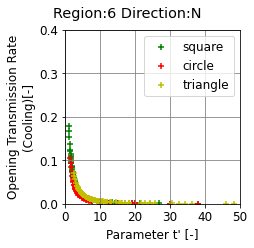

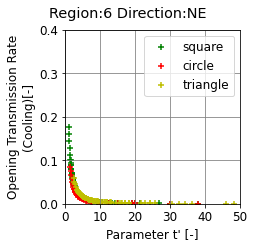

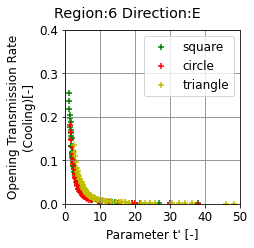

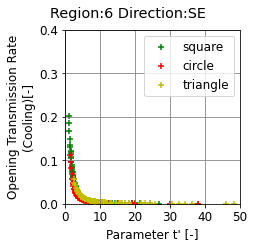

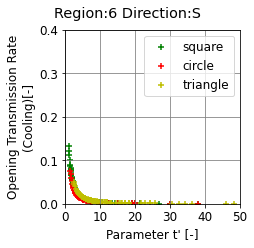

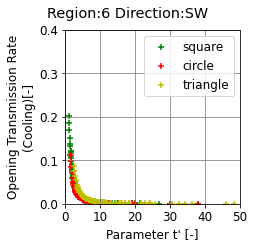

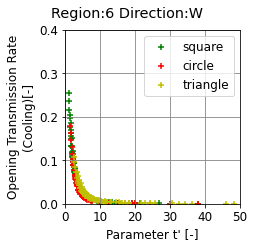

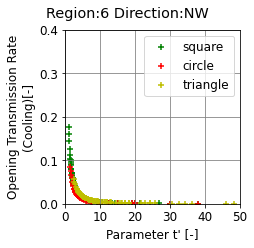

In [77]:
for direction, angle in directions.items():
    
    # グラフ描画
    setPltScatterByType(df = df_all.query('region == ' + str(region) + ' & direction == "' + direction +'"'),
              fig_title = 'Region:' + str(region) + ' Direction:' + direction,
              x_label = 'Parameter t\' [-]',
              y_label = 'Opening Transmission Rate' + '\n' + '(Cooling)[-]', 
              x_data_name = 't_rev',
#               x_data_name = 'partition_area_rate',
              y_data_name = 'tau0_total_c',
#               y_data_name = 'tau_total_c',
              xlim_min = 0.0,
              xlim_max = 50,
              ylim_min = 0.0,
              ylim_max = 0.4,
              file_name = 'parametric_study/cooling_by_type_parametric_study_result' 
                                  + '_region' + str(region) + '_' + direction + '.png'
                 )

#### 花ブロックの開口率別

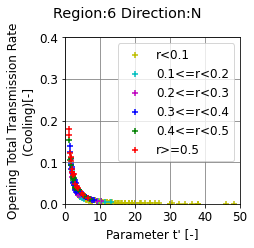

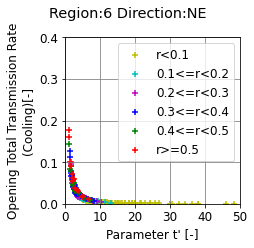

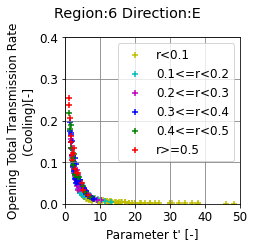

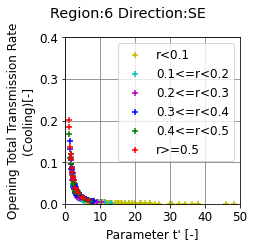

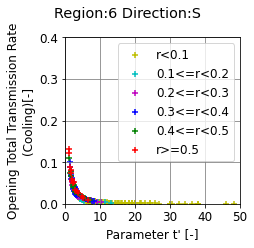

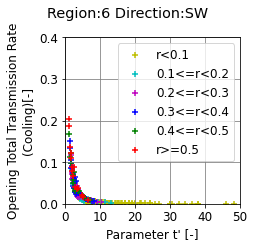

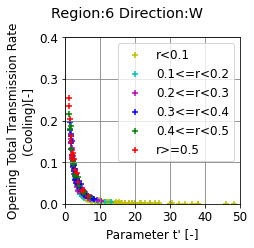

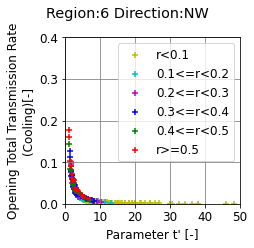

In [78]:
for direction, angle in directions.items():
    
    # グラフ描画
    setPltScatterByRate(df = df_all.query('region == ' + str(region) + ' & direction == "' + direction +'"'),
              fig_title = 'Region:' + str(region) + ' Direction:' + direction,
              x_label = 'Parameter t\' [-]',
              y_label = 'Opening Total Transmission Rate' + '\n' + '(Cooling)[-]', 
              x_data_name = 't_rev',
#               x_data_name = 'partition_area_rate',
              y_data_name = 'tau0_total_c',
#               y_data_name = 'tau_total_c',
              xlim_min = 0.0,
              xlim_max = 50.0,
              ylim_min = 0.0,
              ylim_max = 0.4,
              file_name = 'parametric_study/cooling_by_rate_parametric_study_result' 
                                  + '_region' + str(region) + '_' + direction + '.png'
                 )

### 暖房期間
#### 花ブロックの形状別

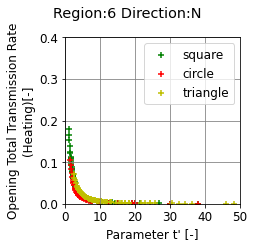

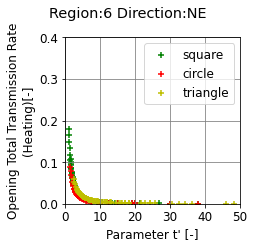

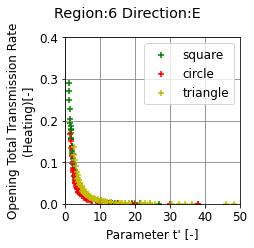

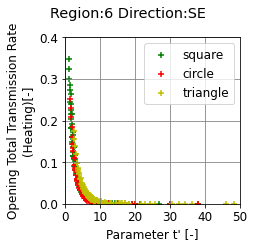

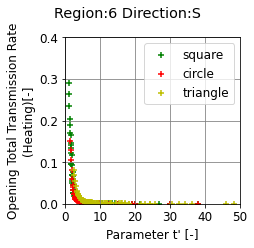

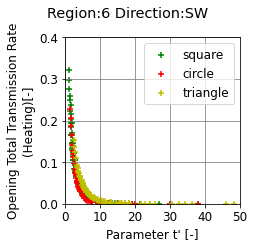

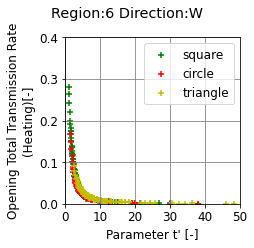

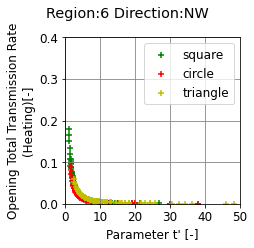

In [79]:
for direction, angle in directions.items():
    
    # グラフ描画
    setPltScatterByType(df = df_all.query('region == ' + str(region) + ' & direction == "' + direction +'"'),
              fig_title = 'Region:' + str(region) + ' Direction:' + direction,
              x_label = 'Parameter t\' [-]',
              y_label = 'Opening Total Transmission Rate' + '\n' + '(Heating)[-]',
              x_data_name = 't_rev',
#               x_data_name = 'partition_area_rate',
              y_data_name = 'tau0_total_h',
#               y_data_name = 'tau_total_h',
              xlim_min = 0.0,
              xlim_max = 50.0,
              ylim_min = 0.0,
              ylim_max = 0.4,
              file_name = 'parametric_study/heating_by_type_parametric_study_result' 
                                  + '_region' + str(region) + '_' + direction + '.png'
                 )

#### 花ブロックの開口率別

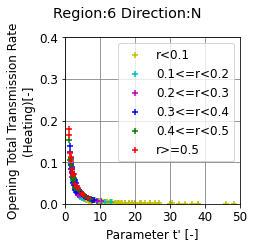

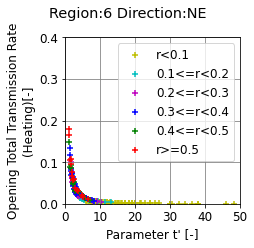

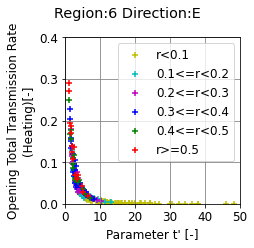

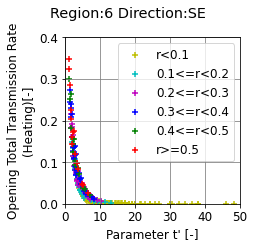

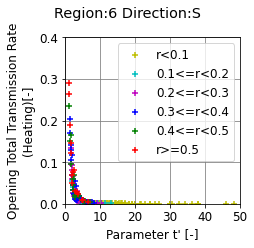

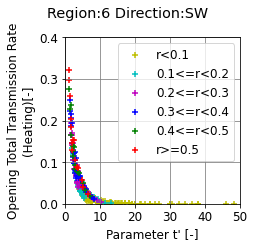

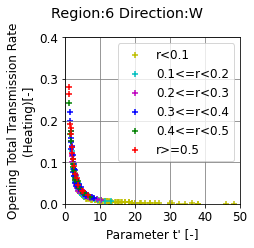

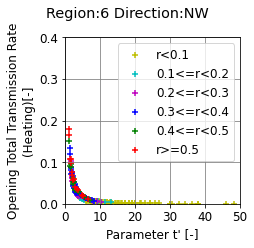

In [80]:
for direction, angle in directions.items():
    
    # グラフ描画
    setPltScatterByRate(df = df_all.query('region == ' + str(region) + ' & direction == "' + direction +'"'),
              fig_title = 'Region:' + str(region) + ' Direction:' + direction,
              x_label = 'Parameter t\' [-]',
              y_label = 'Opening Total Transmission Rate' + '\n' + '(Heating)[-]',
              x_data_name = 't_rev',
#               x_data_name = 'partition_area_rate',
              y_data_name = 'tau0_total_h',
#               y_data_name = 'tau_total_h',
              xlim_min = 0.0,
              xlim_max = 50.0,
              ylim_min = 0.0,
              ylim_max = 0.4,
              file_name = 'parametric_study/heating_by_rate_parametric_study_result' 
                                  + '_region' + str(region) + '_' + direction + '.png'
                 )

## 花ブロックの期間平均透過率の近似式作成

### フィッティング用の近似式を定義

In [81]:
def fit_exponential(x, a, b):
    return 1.0 - b * (1.0 - np.exp(-a * x))

### 近似結果描画用の関数を定義

In [82]:
def setPltScatter_fitting(df:pd.DataFrame, fig_title:str, x_label:str, y_label:str, x_data_name:str, y_data_name:str,
                 xlim_min:float, xlim_max:float, ylim_min:float, ylim_max:float, file_name:str):
    
    """
    グラフを描画する
    
    :param df: CSVファイルのデータ
    :param fig_title: グラフタイトル
    :param x_label: X軸のラベル
    :param y_label: Y軸のラベル
    :param x_data_name: X軸に設定するデータの名称
    :param y_data_name: Y軸に設定するデータの名称
    :param xlim_min: X軸の下限
    :param xlim_max: X軸の上限
    :param ylim_min: y軸の下限
    :param ylim_max: y軸の上限
    :param file_name: 画像データのファイル名
    :return: なし
    """
        
    # グラフを表示する領域（figureオブジェクト）、グラフを描画する領域（Axesオブジェクト）を作成
    # グラフサイズを指定する　デフォルト：figsize=(6.4, 4.8)、小サイズ：figsize=(3.7, 3.5)
    fig, ax = plt.subplots(figsize=(3.7, 3.5))
    
    # サブプロットの位置調整
    fig.subplots_adjust(left=0.2, bottom=0.2)
    
    # フォントサイズを設定
    plt.rcParams["font.size"] = 12

    # グラフタイトルを設定
    fig.suptitle(fig_title)

    # 補助軸の設定
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='gray', linestyle='-')
    
    # 軸ラベルの設定
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    # 描画用データの用意
    x = df[x_data_name]
    y = df[y_data_name]

    # 近似式の係数を取得
    a_pred, b_pred = curve_fit(fit_exponential, x, y)[0]
    
    # 近似データの用意
    x_pred = np.arange(start=0.0, stop=100.1, step=0.1, dtype=float)
    y_pred = fit_exponential(x_pred, a_pred, b_pred)

    # プロットの設定
    ax.scatter(x, y, color='gray', label= 'calculated', marker='+')
    ax.plot(x_pred, y_pred, color='red', label= 'predicted', linewidth=1)

    # 近似式の表示（text関数の引数：x座標、y座標、表示するテキスト）
    ax.text(np.median(x)*0.8, np.max(y)*1.5, 
            'y=1-'+ str(round(b_pred, 3)) +'(1-exp(' + str(-1 * round(a_pred,3)) + 'x))',
            color='red')
        
    # 軸の描画範囲設定
    ax.set_xlim(xlim_min, xlim_max)
    ax.set_ylim(ylim_min, ylim_max)
    
    # TODO: 横軸の間隔を設定する
    plt.xticks(np.arange(0, xlim_max+10, step=10))
    
    # マージンの設定
#     fig.subplots_adjust(left=0.2)
    
    # パディングの調整
    plt.tight_layout(rect=[0,0,1,0.96])
    
    # グラフ描画&画像データの保存
    plt.legend()
    plt.savefig(file_name, format="png", dpi=72)
    plt.show()

### 近似式を描画
#### 地域区分を設定

In [104]:
region = 8
# 開口率を0.3以上0.4未満に限定
# df_rate_30 = df_all.query('opening_area_rate >= ' + str(0.3) +  ' & opening_area_rate < ' + str(0.4))

#### 冷房期間

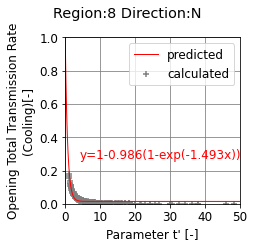

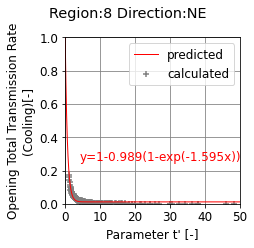

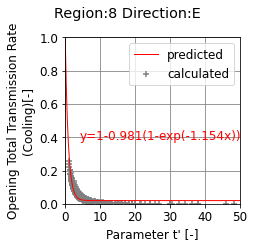

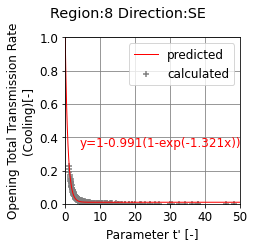

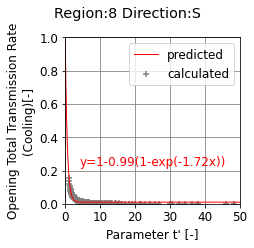

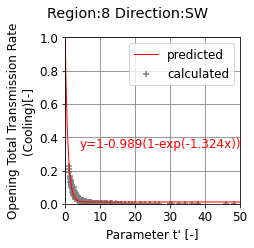

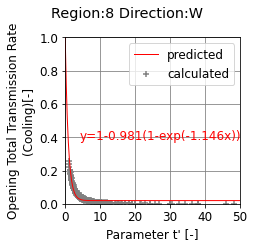

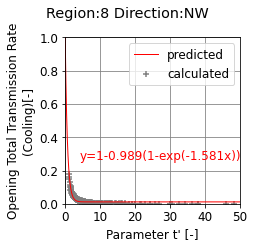

In [105]:
for direction, angle in directions.items():
    
    # グラフ描画
    setPltScatter_fitting(df = df_all.query('region == ' + str(region) + ' & direction == "' + direction +'"'),
              fig_title = 'Region:' + str(region) + ' Direction:' + direction,
              x_label = 'Parameter t\' [-]',
              y_label = 'Opening Total Transmission Rate' + '\n' + '(Cooling)[-]',
              x_data_name = 't_rev',
#               x_data_name = 'partition_area_rate',
              y_data_name = 'tau0_total_c',
#               y_data_name = 'tau_total_c',
              xlim_min = 0.0,
              xlim_max = 50.0,
              ylim_min = 0.0,
              ylim_max = 1,
              file_name = 'parametric_study/predicted_result_cooling' 
                                  + '_region' + str(region) + '_' + direction + '.png'
                 )

#### 暖房期間

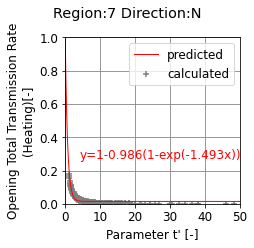

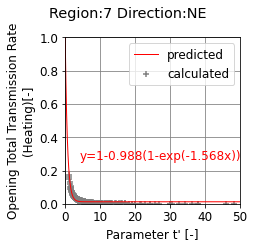

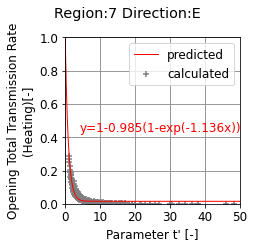

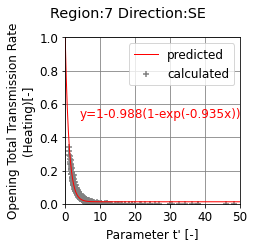

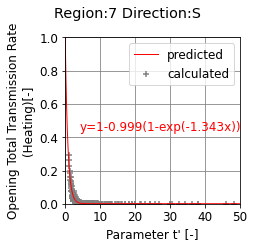

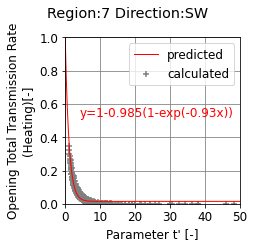

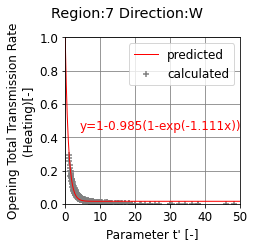

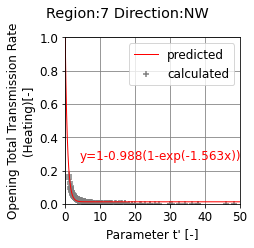

In [103]:
for direction, angle in directions.items():
    
    # グラフ描画
    setPltScatter_fitting(df = df_all.query('region == ' + str(region) + ' & direction == "' + direction +'"'),
              fig_title = 'Region:' + str(region) + ' Direction:' + direction,
              x_label = 'Parameter t\' [-]',
              y_label = 'Opening Total Transmission Rate' + '\n' + '(Heating)[-]',
              x_data_name = 't_rev',
#               x_data_name = 'partition_area_rate',
              y_data_name = 'tau0_total_h',
#               y_data_name = 'tau_total_h',
              xlim_min = 0.0,
              xlim_max = 50.0,
              ylim_min = 0.0,
              ylim_max = 1,
              file_name = 'parametric_study/predicted_result_heating' 
                                  + '_region' + str(region) + '_' + direction + '.png'
                 )

## 近似式の係数を書き出す
### 冷房期間

In [20]:
# 地域区分のリストを設定
regions = [1, 2, 3, 4, 5, 6, 7, 8]
    
# 結果格納用の辞書型を用意
dict_results = {'region': [], 'direction': [], 'a_pred': [], 'b_pred': []}

# 地域区分ループ
for region in regions:
    
    for direction, angle in directions.items():

        df_target = df_all.query('region == ' + str(region) + ' & direction == "' + direction +'"')
        x = df_target['t_rev']
        y = df_target['tau0_total_c']

        # 近似式の係数を取得
        a_pred, b_pred = curve_fit(fit_exponential, x, y)[0]

        # 結果を格納
        dict_results['region'].append(region)
        dict_results['direction'].append(direction)
        dict_results['a_pred'].append(a_pred)
        dict_results['b_pred'].append(b_pred)
    

# 辞書型をDataFrameに変換
df_result = pd.DataFrame.from_dict(dict_results, orient="columns")
# CSVファイルに出力
df_result.to_csv(
        'parametric_study' + '/approximation_coefficient_cooling' + '.csv', encoding="shift-jis"
    )
df_result

,region,direction,a_pred,b_pred
0,1,N,1.493464,0.985734
1,1,NE,1.560683,0.989164
2,1,E,1.067056,0.980932
3,1,SE,1.440607,0.991972
4,1,S,1.868337,0.989354
...,...,...,...,...
59,8,SE,1.321241,0.990637
60,8,S,1.719564,0.990156
61,8,SW,1.323994,0.989197
62,8,W,1.145707,0.980731


### 暖房期間

In [21]:
# 地域区分のリストを設定
regions = [1, 2, 3, 4, 5, 6, 7]
    
# 結果格納用の辞書型を用意
dict_results = {'region': [], 'direction': [], 'a_pred': [], 'b_pred': []}

# 地域区分ループ
for region in regions:
    
    for direction, angle in directions.items():

        df_target = df_all.query('region == ' + str(region) + ' & direction == "' + direction +'"')
        x = df_target['t_rev']
        y = df_target['tau0_total_h']

        # 近似式の係数を取得
        a_pred, b_pred = curve_fit(fit_exponential, x, y)[0]

        # 結果を格納
        dict_results['region'].append(region)
        dict_results['direction'].append(direction)
        dict_results['a_pred'].append(a_pred)
        dict_results['b_pred'].append(b_pred)
    

# 辞書型をDataFrameに変換
df_result = pd.DataFrame.from_dict(dict_results, orient="columns")
# CSVファイルに出力
df_result.to_csv(
        'parametric_study' + '/approximation_coefficient_heating' + '.csv', encoding="shift-jis"
    )
df_result

,region,direction,a_pred,b_pred
0,1,N,1.493464,0.985734
1,1,NE,1.564644,0.988570
2,1,E,1.110511,0.982857
3,1,SE,0.973176,0.986898
4,1,S,1.132300,0.996600
5,1,SW,0.998804,0.985912
6,1,W,1.132163,0.985590
7,1,NW,1.558853,0.988345
8,2,N,1.493464,0.985734
9,2,NE,1.563021,0.988778


## テスト

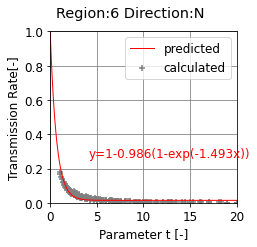

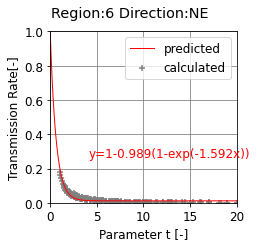

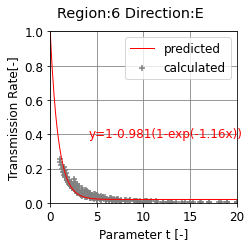

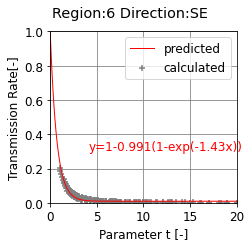

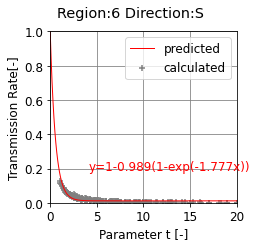

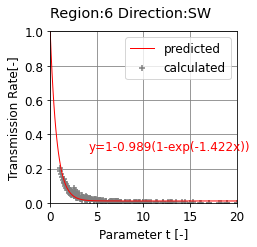

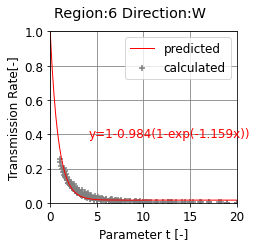

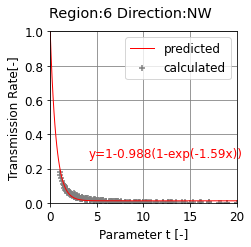

In [38]:
for direction, angle in directions.items():
    
    # グラフ描画
    setPltScatter_fitting(df = df_all.query('region == ' + str(region) + ' & direction == "' + direction +'"'),
              fig_title = 'Region:' + str(region) + ' Direction:' + direction,
              x_label = 'Parameter t [-]',
              y_label = 'Transmission Rate[-]', 
              x_data_name = 't_rev',
              y_data_name = 'tau0_total_c',
              xlim_min = 0.0,
              xlim_max = 20.0,
              ylim_min = 0.0,
              ylim_max = 1.0,
              file_name = 'parametric_study/predicted_result_heating_rate50' 
                                  + '_region' + str(region) + '_' + direction + '.png'
                 )

In [21]:
def f(x, a, b):
    return 1.0 - b * (1.0 - np.exp(-a * x))
#     return b * np.exp(a * x)

direction = 'SW'
df = df_rate_50.query('region == ' + str(6) + ' & direction == "' + direction +'"')
x = df['partition_area_rate']
y = df['tau_total_h']

print(curve_fit(f, x, y)[0])

[2.81935631 0.95709997]


In [22]:
a_pred, b_pred = curve_fit(f, x, y)[0]
y_pred = f(x, a_pred, b_pred)
y_pred

13    0.150363
13    0.078909
13    0.057915
13    0.220972
13    0.199364
13    0.119709
13    0.106162
13    0.082098
13    0.073557
13    0.069032
13    0.047218
13    0.043923
13    0.047777
13    0.043248
13    0.042942
Name: partition_area_rate, dtype: float64

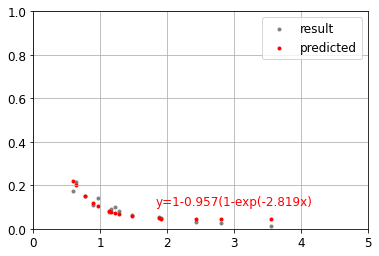

In [23]:
# 描画する。
fig, ax = plt.subplots()

ax.scatter(x, y, color='gray', label="result", marker=".")
ax.scatter(x, y_pred, color='red', label="predicted", marker=".")

# 近似式の表示（text関数の引数：x座標、y座標、表示するテキスト）
ax.text(np.median(x)*1.5, np.median(y_pred)*1.5, 
        'y=1-'+ str(round(b_pred, 3)) +'(1-exp(' + str(-1 * round(a_pred,3)) + 'x)', color="red")
    
ax.set_xlim(0.0, 5.0)
ax.set_ylim(0.0, 1.0)
    
ax.legend()
ax.grid()

plt.show()